# Lenses and performance

For 

In [3]:
from diffractio import degrees, mm, plt, sp, um, np


%matplotlib inline  

from matplotlib import rcParams
rcParams['figure.figsize']=(6,4)
rcParams['figure.dpi']=200

## Lens in x mode

In [4]:
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.utils_optics import beam_width_1D, FWHM1D


In [56]:
# Initial parameters
x0 = np.linspace(-2*mm, 2*mm, 1024*32)
wavelength = 0.6238 * um


# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, radius=1*mm, focal=25*mm, mask=True);

In [57]:
u1=t0*u0
u2=u1.RS(z=25*mm, verbose=False);

(-25, 25)

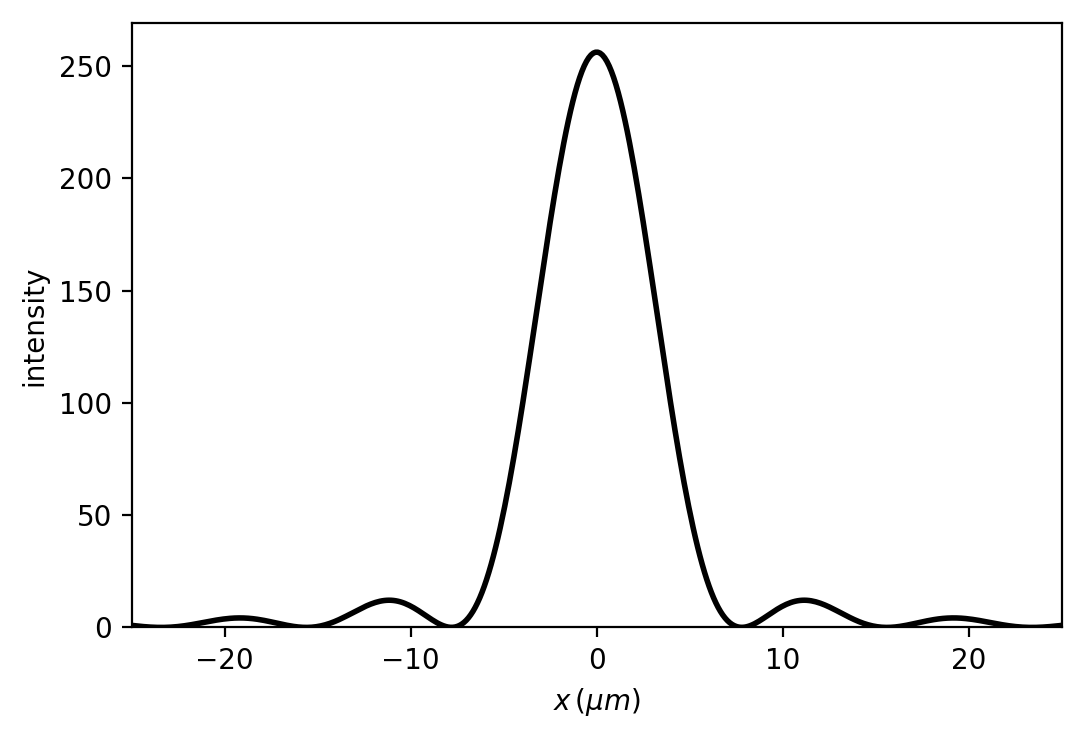

In [58]:
u2.draw()
plt.xlim(-25,25)

### Beam width computation

In [81]:
width,center=beam_width_1D(u2.u,u2.x)

(8.605832865910411, 6.904726040454307)


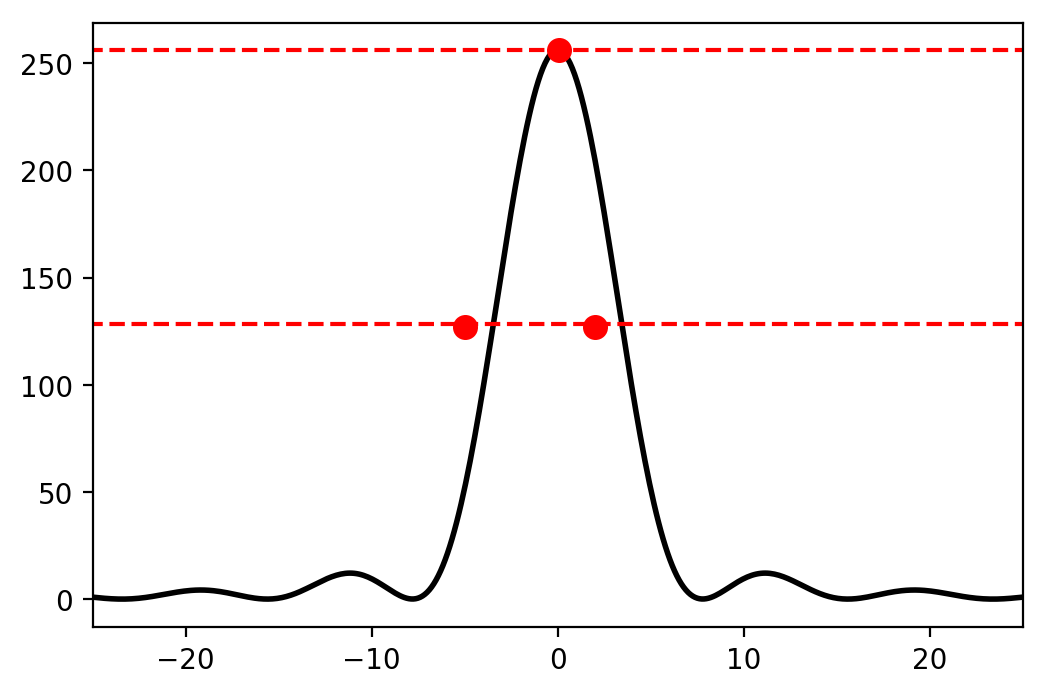

In [82]:
fwhm=FWHM1D(u2.x, np.abs(u2.u)**2, has_drawing=True, percentaje=0.5)
plt.xlim(-25,25)
print(width, fwhm)

ValueError: attempt to get argmin of an empty sequence

### MTF

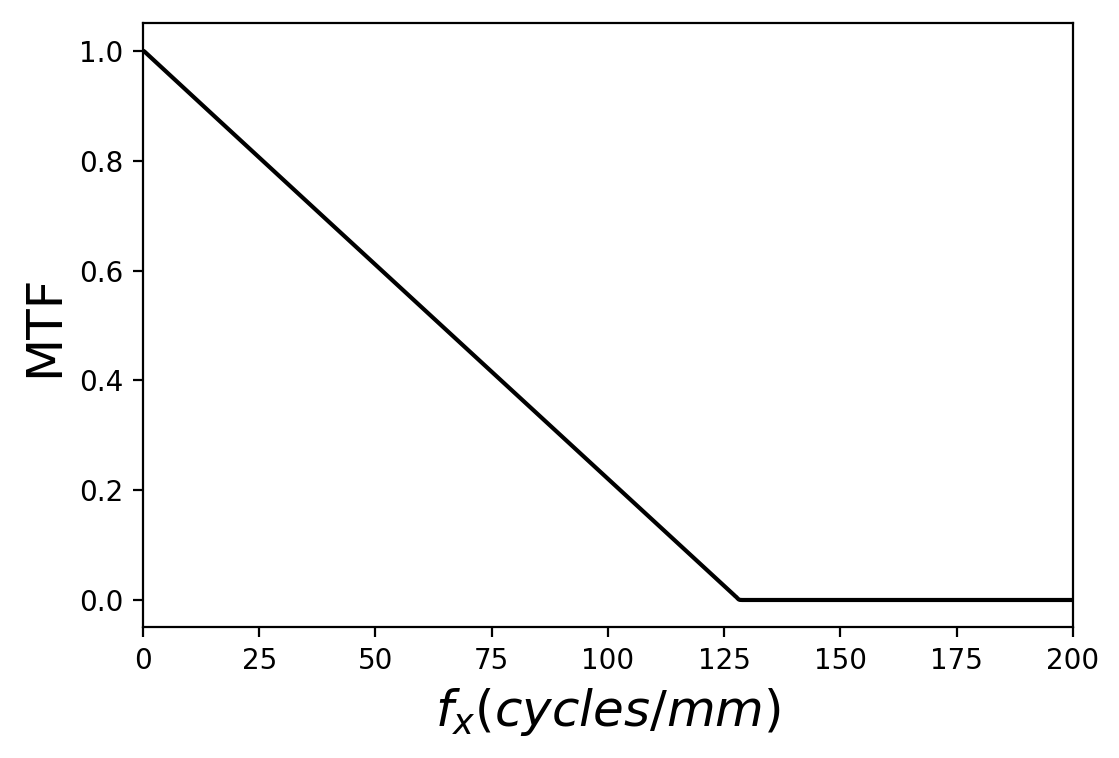

In [83]:
u2.MTF(has_draw=True);
plt.xlim(0,200);

### Several rays

In [84]:
# Initial parameters
x0 = np.linspace(-2*mm, 2*mm, 1024*32)
wavelength = 0.6238 * um


# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_waves_several_inclined(A=1, num_beams=7, max_angle=10*degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, radius=1*mm, focal=25*mm, mask=True);

In [85]:
u1=t0*u0
u2=u1.RS(z=25*mm, verbose=False);

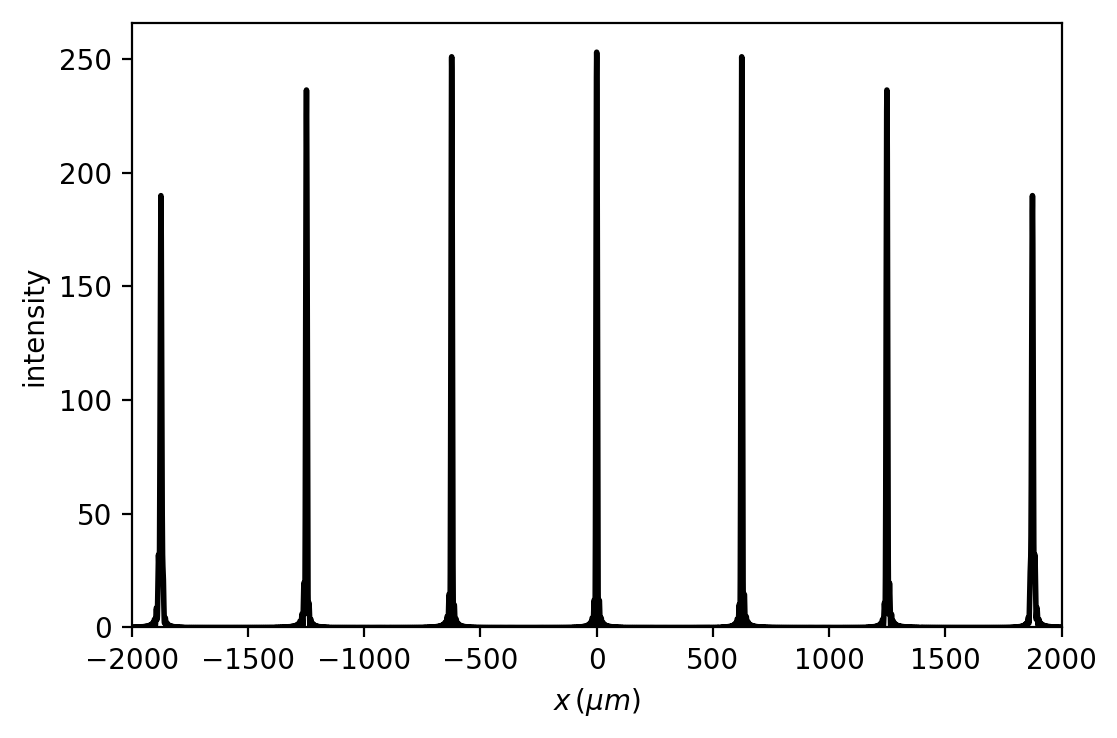

In [86]:
u2.draw()

(-75, 75)

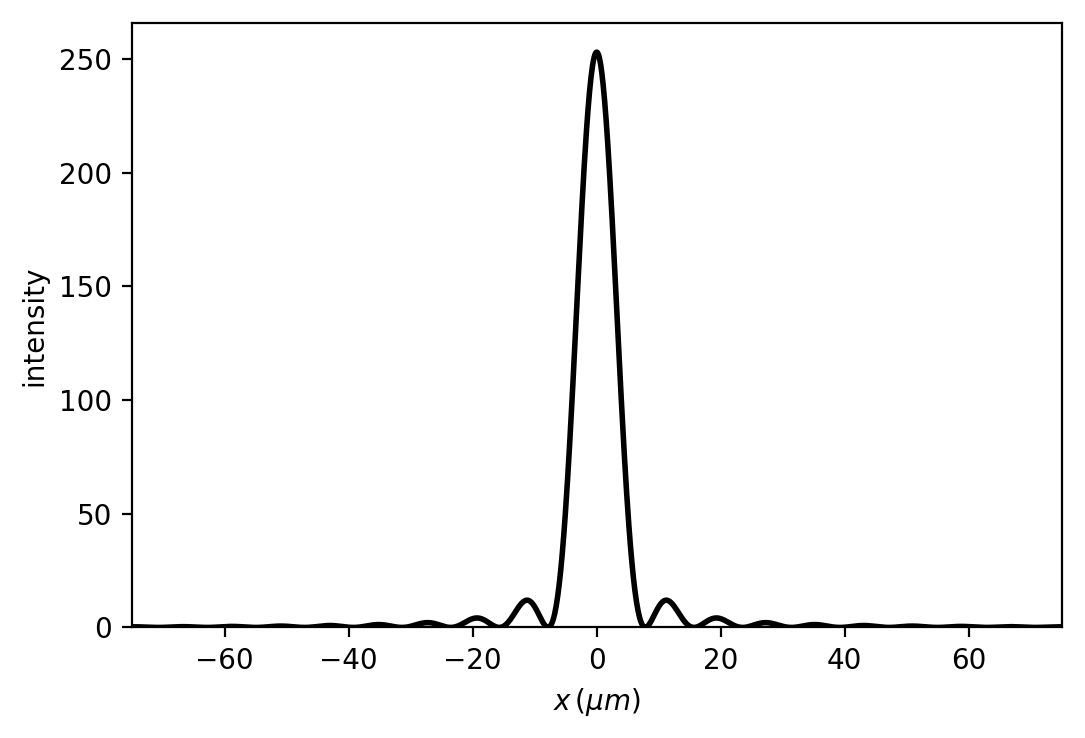

In [87]:
u2.draw()
plt.xlim(-75,75)

(1800, 1950)

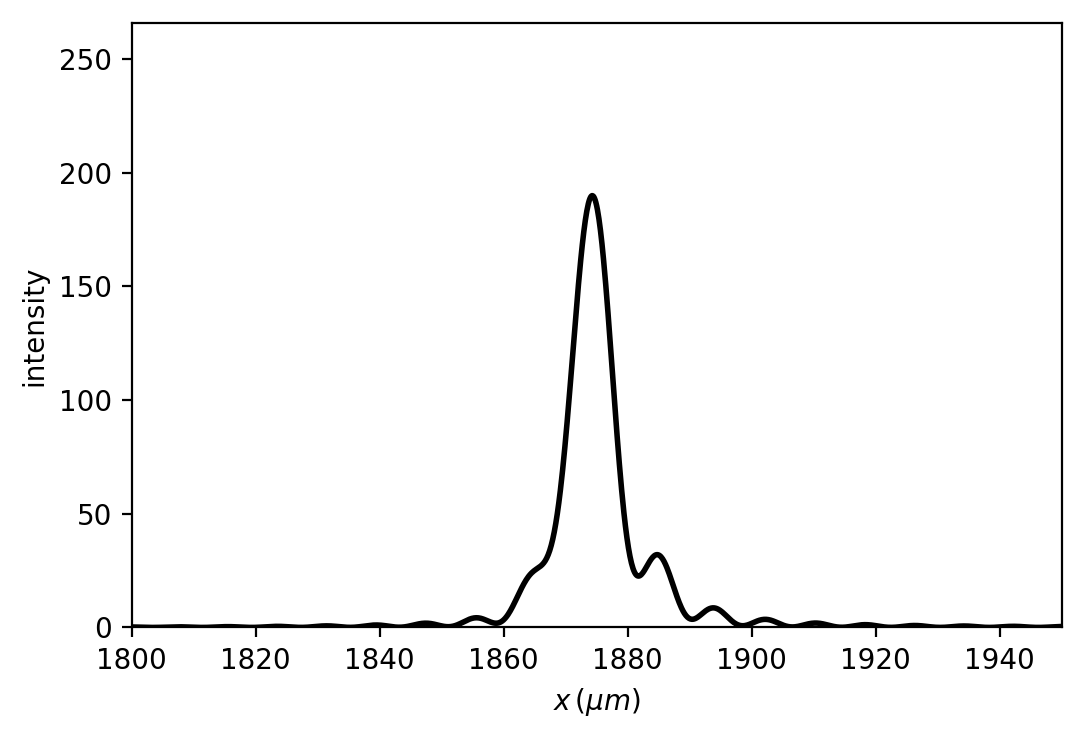

In [88]:
u2.draw()
plt.xlim(1800,1950)

## XZ lens

In [50]:
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

185.185185185


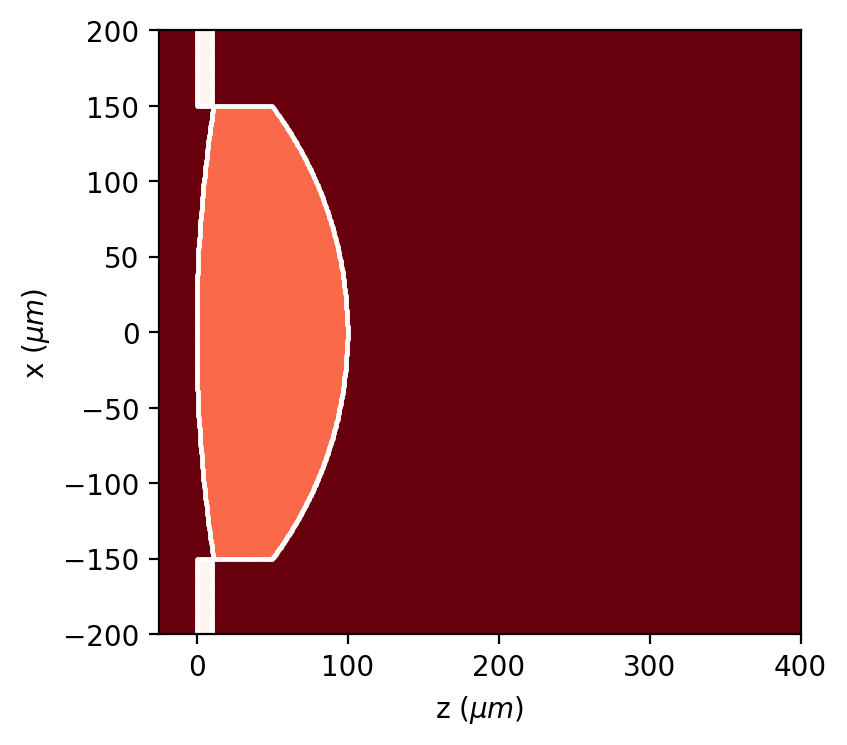

In [109]:
x0 = np.linspace(-200 * um, 200 * um, 1024*2)
z0 = np.linspace(-25 * um, 400 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0*degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal,_ = u1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))
print(focal)
u1.draw_refraction_index(scale='scaled')
edge_matrix=u1.borders

u1.filter_refraction_index(pixels_filtering=25,type_filter=2);


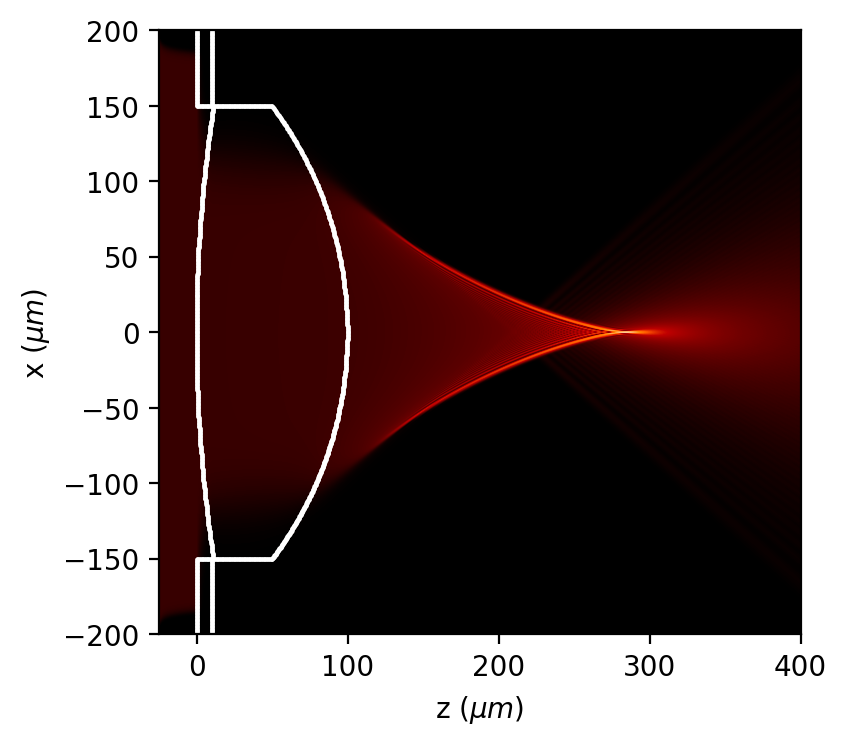

In [110]:
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, 
        scale='scaled', edge_matrix=edge_matrix);

## Effect of rotation

In [111]:
x0 = np.linspace(-200 * um, 200 * um, 1024*2)
z0 = np.linspace(-25 * um, 400 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0*degrees)


185.185185185


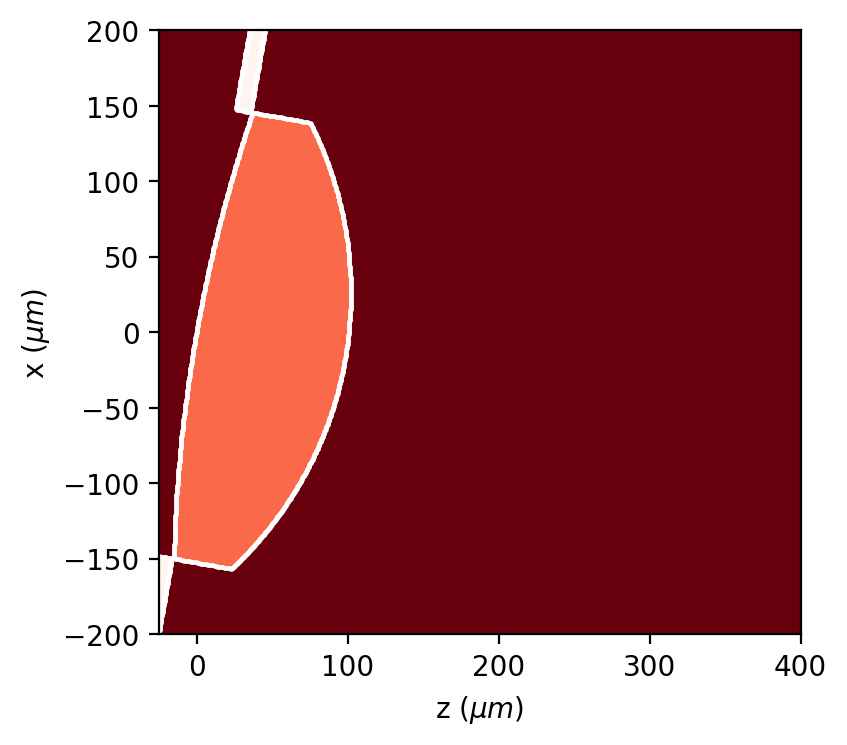

In [112]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal,_ = u1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=10 * degrees,
    mask=(10 * um, 3 + 0.05j))
print(focal)
u1.draw_refraction_index(scale='scaled')
edge_matrix=u1.borders

u1.filter_refraction_index(pixels_filtering=25,type_filter=2);

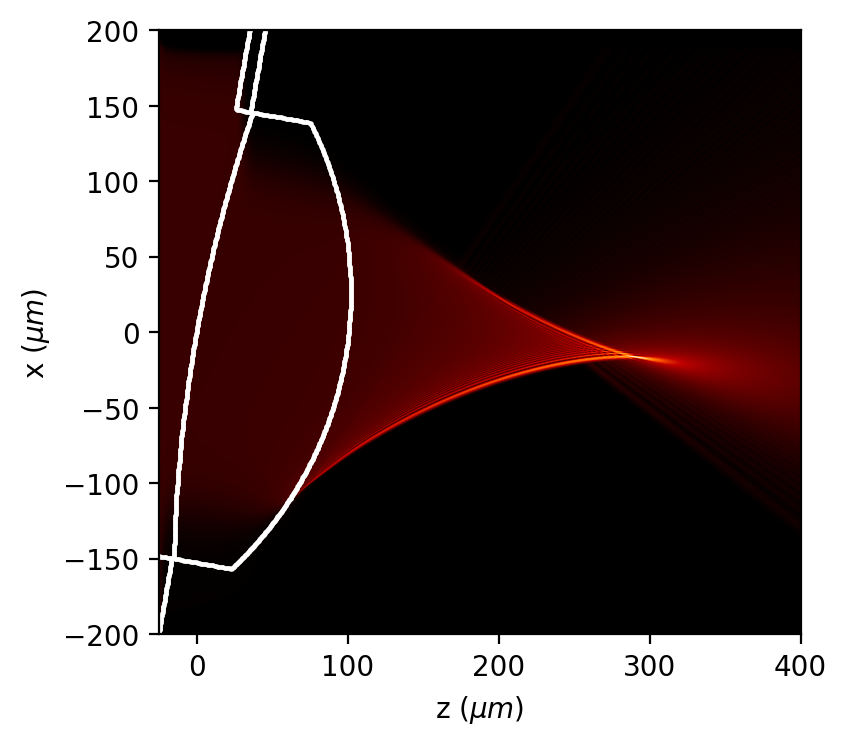

In [113]:
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, 
        scale='scaled', edge_matrix=edge_matrix);

In [114]:
x_f,z_f=u1.search_focus()

x = -16.317 um, z = 289.158 um


(-36.31656082071325, 3.6834391792867507)

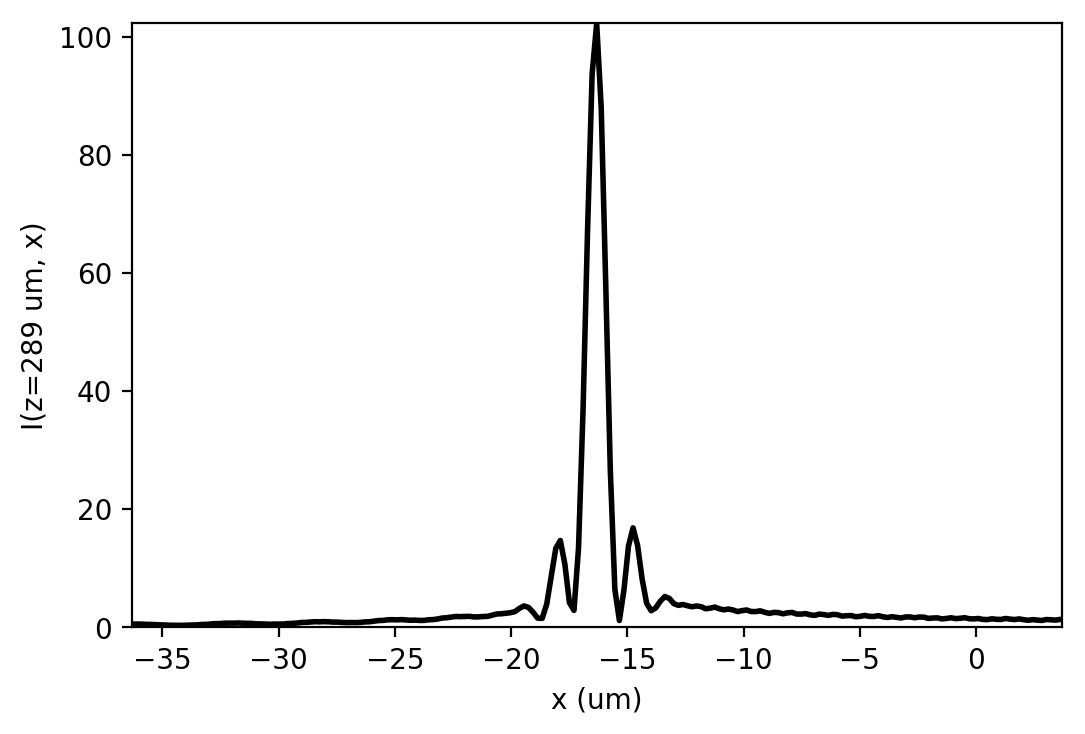

In [115]:
u1.profile_transversal(z0=z_f, draw=True);
plt.xlim(x_f-20,x_f+20)

In [1]:
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [13]:
x0 = np.linspace(-200 * um, 200 * um, 1024 * 1)
z0 = np.linspace(-25 * um, 400 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beams_several_parallel(A=1,
    num_beams=10, w0=5, z0=10, x_central=0.0, x_range=200.0, theta=0.0)

185.185185185


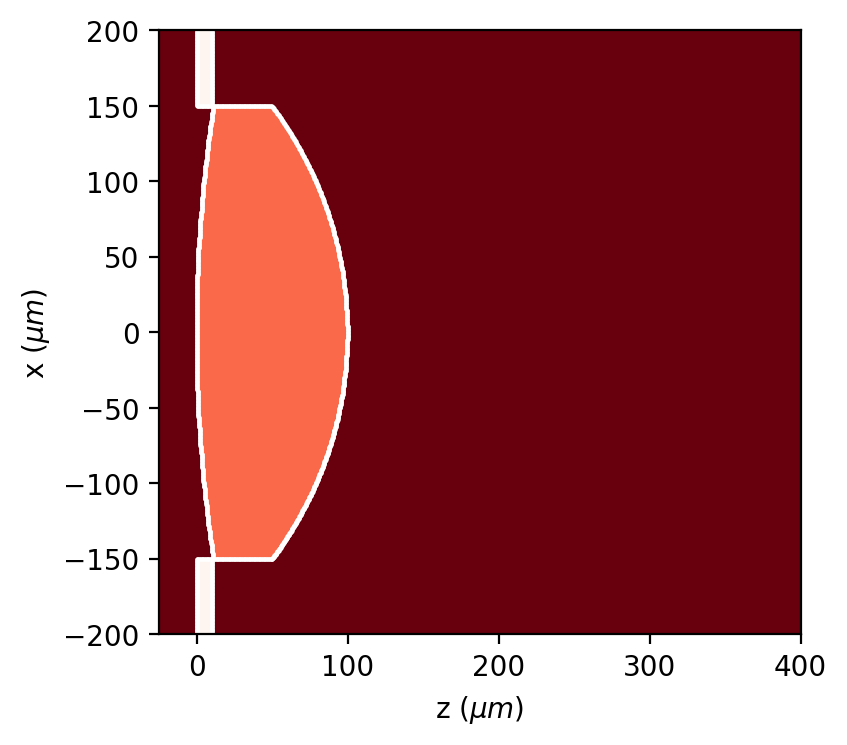

In [14]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal,_ = u1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))
print(focal)
u1.draw_refraction_index(scale='scaled')
edge_matrix=u1.borders

u1.filter_refraction_index(pixels_filtering=25,type_filter=2);

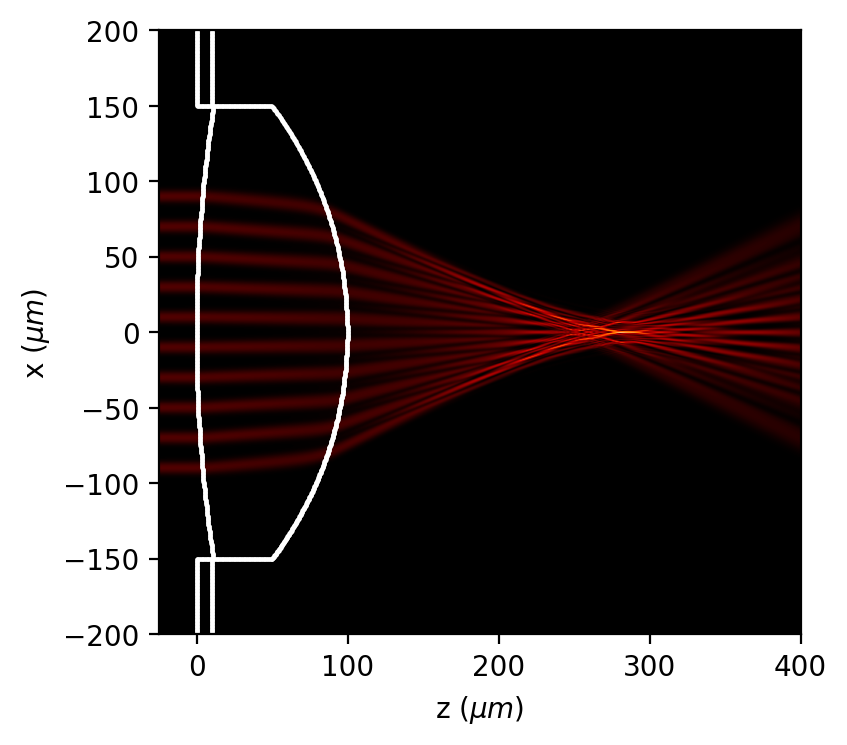

In [15]:
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, 
        scale='scaled', edge_matrix=edge_matrix);